# Initial Debugging Notebook

Test out basic regression loss functions, link functions, and general BoostModel implementation using a scikit-learn LinearRegression model as the booster. Each run below should result in decreasing loss over model iterations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.datasets import make_regression
from sklearn.base import clone as clone_model

from genestboost import BoostedModel
from genestboost.link_functions import *
from genestboost.loss_functions import *

%matplotlib inline

### Create Fake Dataset for Regression

In [2]:
X, y = make_regression(n_samples=10000,
                       n_features=30,
                       n_informative=30,
                       noise=1.0,
                       random_state=0)
X = scale(X)
y = scale(y)

### Wrapper for Linear Regression sklearn model to boost

In [3]:
class LinearRegressionExt(LinearRegression):
    def clone(self):
        return clone_model(self)
lr_model = LinearRegressionExt()

### Test 1: Identity Link with Least Squares Loss 

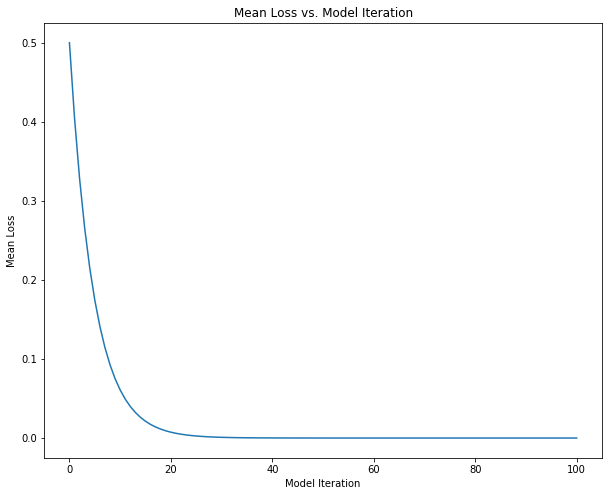

In [4]:
model = BoostedModel(link=IdentityLink(),
                     loss=LeastSquaresLoss())
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Identity Link with Least Squares Loss and Newton Weights

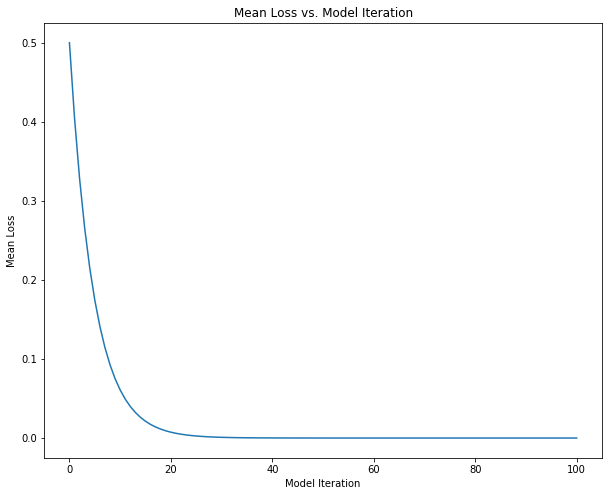

In [5]:
model = BoostedModel(link=IdentityLink(),
                     loss=LeastSquaresLoss(),
                     weights="newton")
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 2: Identity Link with Absolute Loss

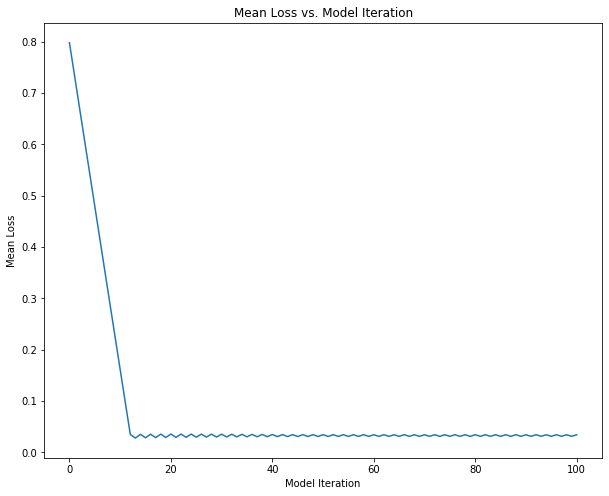

In [6]:
model = BoostedModel(link=IdentityLink(),
                     loss=AbsoluteLoss(),
                     alpha=0.1)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 3: Identity Link with Log Cosh Loss

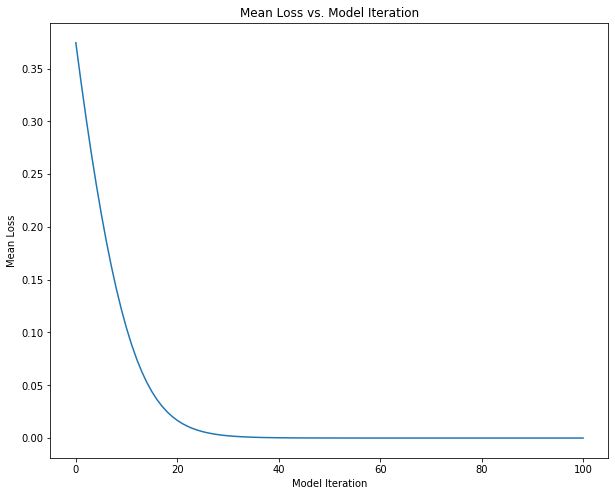

In [7]:
model = BoostedModel(link=IdentityLink(),
                     loss=LogCoshLoss(),
                     alpha=0.1)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 4: Identity Link with Log Cosh Loss and Newton Weights

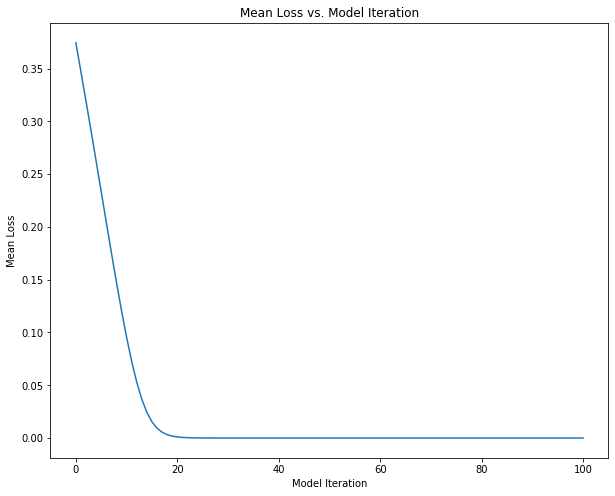

In [8]:
model = BoostedModel(link=IdentityLink(),
                     loss=LogCoshLoss(),
                     alpha=0.25,
                     weights="newton")
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 5: Identity Link with Quantile Loss - p = 0.5 (should approximately match AbsoluteLoss above)

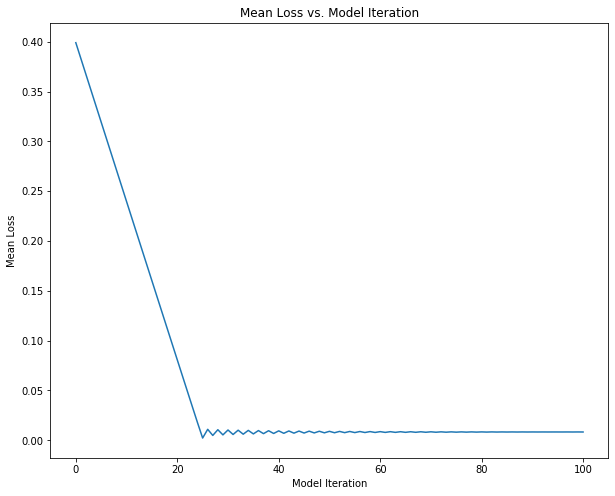

In [9]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.5),
                     alpha=0.1)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

### Test 6: Identity Link with Quantile Loss - p = 0.95

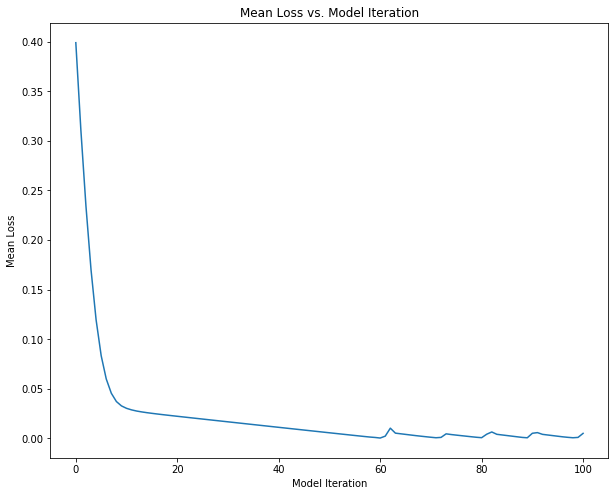

In [10]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.95),
                     alpha=0.25)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

In [11]:
model.predict(X)[:10]   # should be greater than below predicted

array([ 1.60582352, -5.13112416,  5.65938131,  6.95928983,  1.15506899,
       -0.97022721, -1.96450827,  4.51752512,  6.2121319 ,  0.39039146])

### Test 7: Identity Link with Quantile Loss - p = 0.05

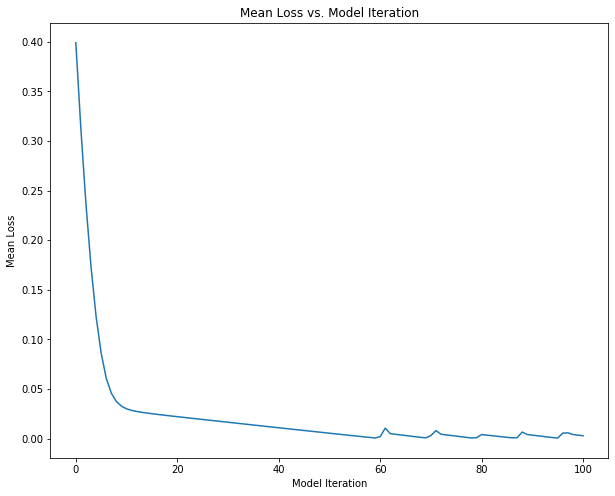

In [12]:
model = BoostedModel(link=IdentityLink(),
                     loss=QuantileLoss(p=0.05),
                     alpha=0.25)
model.fit(X, y, lr_model, iterations=100)

# plot loss to make sure it is decreasing
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.plot(model._loss_list)
ax.set_title("Mean Loss vs. Model Iteration")
ax.set_xlabel("Model Iteration")
ax.set_ylabel("Mean Loss");

In [13]:
model.predict(X)[:10]   # should be less than above predicted

array([ 1.326532  , -5.99394814,  5.20640484,  6.50610454,  0.56510061,
       -1.50638135, -2.65371543,  3.56162731,  5.62134397, -0.3084972 ])